### LSTM (Long Short-Term Memory Networks)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
sales = pd.read_csv('dataset/sales_dataset.csv', parse_dates=True, index_col=0)

In [3]:
target = np.array(sales.Sales)

In [4]:
train_target = target[:-9].reshape(-1,1)
test_target = target[-9:].reshape(-1,1)

In [5]:
scaler = StandardScaler()
scaler.fit(train_target)
scaledTrainData = scaler.transform(train_target)
scaledTestData = scaler.transform(test_target)

In [6]:
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs).reshape(-1,time_steps,1), np.array(ys)

In [7]:
time_steps=12
X_train, y_train = create_dataset(scaledTrainData, scaledTrainData, time_steps)

In [8]:
X_train.shape, y_train.shape

((84, 12, 1), (84, 1))

In [17]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=70,
  return_sequences=True,  
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.LSTM(units=70, return_sequences=True))
model.add(keras.layers.LSTM(units=70))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [18]:
history = model.fit(
    X_train, y_train,
    epochs=250,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 75 samples, validate on 9 samples
Epoch 1/250
75/75 [==============================] - 3s 41ms/sample - loss: 0.9869 - val_loss: 1.5919
Epoch 2/250
75/75 [==============================] - 0s 1ms/sample - loss: 0.9122 - val_loss: 1.3555
Epoch 3/250
75/75 [==============================] - 0s 1000us/sample - loss: 0.7777 - val_loss: 1.0474
Epoch 4/250
75/75 [==============================] - 0s 963us/sample - loss: 0.6489 - val_loss: 0.8397
Epoch 5/250
75/75 [==============================] - 0s 972us/sample - loss: 0.4952 - val_loss: 0.6717
Epoch 6/250
75/75 [==============================] - 0s 949us/sample - loss: 0.3126 - val_loss: 0.5194
Epoch 7/250
75/75 [==============================] - 0s 980us/sample - loss: 0.3226 - val_loss: 0.4347
Epoch 8/250
75/75 [==============================] - 0s 957us/sample - loss: 0.4819 - val_loss: 0.9901
Epoch 9/250
75/75 [==============================] - 0s 993us/sample - loss: 0.5574 - val_loss: 0.7564
Epoch 10/250
75/75 [============

75/75 [==============================] - 0s 974us/sample - loss: 0.1004 - val_loss: 0.1198
Epoch 80/250
75/75 [==============================] - 0s 971us/sample - loss: 0.1077 - val_loss: 0.1717
Epoch 81/250
75/75 [==============================] - 0s 992us/sample - loss: 0.1184 - val_loss: 0.0952
Epoch 82/250
75/75 [==============================] - 0s 941us/sample - loss: 0.1321 - val_loss: 0.1941
Epoch 83/250
75/75 [==============================] - 0s 931us/sample - loss: 0.1612 - val_loss: 0.0918
Epoch 84/250
75/75 [==============================] - 0s 1ms/sample - loss: 0.1270 - val_loss: 0.1031
Epoch 85/250
75/75 [==============================] - 0s 983us/sample - loss: 0.1106 - val_loss: 0.1603
Epoch 86/250
75/75 [==============================] - 0s 996us/sample - loss: 0.1051 - val_loss: 0.1024
Epoch 87/250
75/75 [==============================] - 0s 960us/sample - loss: 0.1035 - val_loss: 0.1328
Epoch 88/250
75/75 [==============================] - 0s 959us/sample - loss: 0

75/75 [==============================] - 0s 925us/sample - loss: 0.0737 - val_loss: 0.1039
Epoch 158/250
75/75 [==============================] - 0s 944us/sample - loss: 0.0703 - val_loss: 0.0828
Epoch 159/250
75/75 [==============================] - 0s 924us/sample - loss: 0.0700 - val_loss: 0.0953
Epoch 160/250
75/75 [==============================] - 0s 948us/sample - loss: 0.0707 - val_loss: 0.0814
Epoch 161/250
75/75 [==============================] - 0s 937us/sample - loss: 0.0692 - val_loss: 0.0982
Epoch 162/250
75/75 [==============================] - 0s 913us/sample - loss: 0.0715 - val_loss: 0.0828
Epoch 163/250
75/75 [==============================] - 0s 946us/sample - loss: 0.0713 - val_loss: 0.1044
Epoch 164/250
75/75 [==============================] - 0s 941us/sample - loss: 0.0753 - val_loss: 0.0769
Epoch 165/250
75/75 [==============================] - 0s 945us/sample - loss: 0.0766 - val_loss: 0.1112
Epoch 166/250
75/75 [==============================] - 0s 938us/sampl

75/75 [==============================] - 0s 950us/sample - loss: 0.0435 - val_loss: 0.0674
Epoch 236/250
75/75 [==============================] - 0s 943us/sample - loss: 0.0420 - val_loss: 0.0521
Epoch 237/250
75/75 [==============================] - 0s 923us/sample - loss: 0.0410 - val_loss: 0.0631
Epoch 238/250
75/75 [==============================] - 0s 962us/sample - loss: 0.0398 - val_loss: 0.0594
Epoch 239/250
75/75 [==============================] - 0s 943us/sample - loss: 0.0390 - val_loss: 0.0614
Epoch 240/250
75/75 [==============================] - 0s 942us/sample - loss: 0.0385 - val_loss: 0.0623
Epoch 241/250
75/75 [==============================] - 0s 957us/sample - loss: 0.0378 - val_loss: 0.0604
Epoch 242/250
75/75 [==============================] - 0s 944us/sample - loss: 0.0376 - val_loss: 0.0627
Epoch 243/250
75/75 [==============================] - 0s 953us/sample - loss: 0.0370 - val_loss: 0.0607
Epoch 244/250
75/75 [==============================] - 0s 927us/sampl

In [19]:
ypred = []
for i in range(len(scaledTestData)):
    if i == 0:
        ypred.append(model.predict(scaledTrainData[-12:].reshape(1,time_steps,1)))        
    else:
        prev_predictions = [x[0][0] for x in ypred]
        ypred.append(model.predict(np.concatenate((scaledTrainData[-12+i:].reshape(-1),prev_predictions)) \
                                   .reshape(1,time_steps,1)))  

In [20]:
ypred

[array([[-0.38374257]], dtype=float32),
 array([[-0.41269282]], dtype=float32),
 array([[-0.40799436]], dtype=float32),
 array([[-0.33902773]], dtype=float32),
 array([[-0.30303952]], dtype=float32),
 array([[-0.30691248]], dtype=float32),
 array([[-0.50181156]], dtype=float32),
 array([[-1.1704886]], dtype=float32),
 array([[0.1604942]], dtype=float32)]

In [21]:
ypred = [x[0][0] for x in ypred]

In [22]:
ypred

[-0.38374257,
 -0.41269282,
 -0.40799436,
 -0.33902773,
 -0.30303952,
 -0.30691248,
 -0.50181156,
 -1.1704886,
 0.1604942]

In [23]:
predictions = np.round(scaler.inverse_transform(ypred))
predictions

array([3795., 3719., 3731., 3912., 4007., 3997., 3484., 1727., 5225.],
      dtype=float32)

In [24]:
np.sqrt(mean_squared_error(test_target,predictions))

752.9031219958589

In [25]:
print('R2 score for LSTM when root mean squared error is minimized is %.2f' %r2_score(test_target, predictions))

R2 score for LSTM when root mean squared error is minimized is 0.60


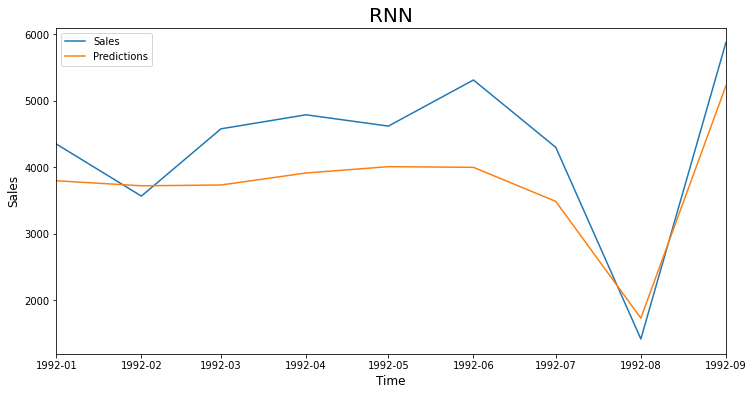

In [26]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(sales.index[-9:], sales.Sales[-9:], label='Sales');
ax.plot(sales.index[-9:], predictions, label='Predictions');

ax.set_xlim(sales.index[-9], sales.index[-1])

ax.set_ylabel('Sales', fontsize=12)
ax.set_xlabel('Time', fontsize=12)
ax.set_title('RNN', fontsize=20)
plt.legend(loc='upper left')
plt.show()

### Conclusion and Results

The predictions are done by taking 12 time steps. For the prediciton of sales at 1992-01, the last 12 time steps from the training set are taken. For the prediction of sales at 1992-02, the last 11 time steps from the training set and the last prediction (prediction at 1992-01) are taken. For the prediction of sales at 1992-03, the last 10 time steps from the training set and the last 2 predicitions (predictions at 1992-01 and 1992-02) are taken. This continues untill all the predictions for sales are made for the last months.    

The neural network topology designed using LSTM layers results in higher RMSE for the last 9 months compared to exponential smoothing, random forests and SARIMA. However, ridge regression is the model with the highest RMSE. 

This network can be fiddled with to try to decrease RMSE. Some of the options can be adding more layers, increasing the # of neurons in each layer, adding dropout layers, adding regularization, changing the learning rate and so on. The possible path for following can be decided after figuring out if overfitting or underfitting is the problem. When validation loss is compared with training loss, it seems that overfitting is the problem.

Since the RNN results are not as good as exponential smoothing results in terms of RMSE measured on the last 9 months, the results are not saved to a csv file. There is not too much training data for deep learning to work well. Deep learning can be a good option when there is abundant data to train on.  